# Fading between two maps

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/fading_between_maps.html

Often it is useful to plot two maps of the Sun on top of each other, so
features observed in one map (e.g. strong magnetic fields in a magnetogram)
can be identified with features in the same place in another map
(e.g. active regions in a EUV image).

This example shows how to plot two maps on top of each other, with a slider to
fade between them. Note that it assumes that the two maps are taken at the same
time from the same observation point.

In [ ]:
%matplotlib ipympl

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

import astropy.units as u

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE, AIA_1600_IMAGE

Start by loading two AIA maps from the sample data.

Note that these maps must be co-aligned. If they are taken at different times
or from different observation locations they will need to be aligned using
`sunpy.map.GenericMap.rotate` or `reproject`.

In [ ]:
map_171 = sunpy.map.Map(AIA_171_IMAGE)
map_1600 = sunpy.map.Map(AIA_1600_IMAGE)

First we create a figure, and add the axes that will show the maps. Then
plot both of the images on the same axes. Finally, we add another axes that
contains the slider.

Finally, define what happens when the slider is changed and link this to the
slider we set up above. In this case we just set the alpha (ie. transparency)
of the 171 image.

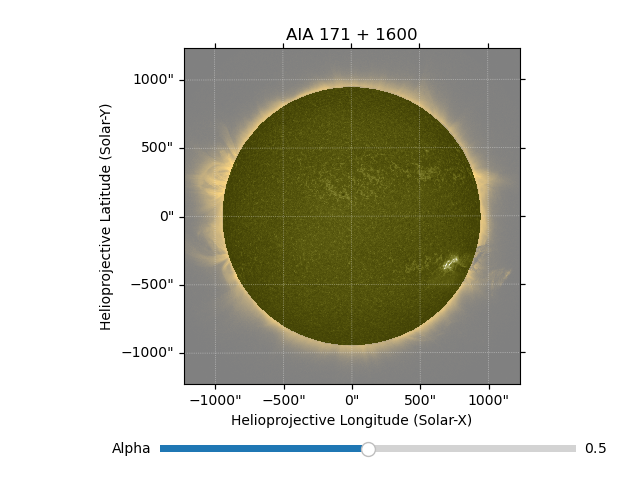

In [ ]:
fig = plt.figure()
# Add the main axes. Note this is resized to leave room for the slider axes
ax = fig.add_axes([0.1, 0.2, 0.9, 0.7], projection=map_171)

im_1600 = map_1600.plot(axes=ax, autoalign=True)
im_171 = map_171.plot(axes=ax, alpha=0.5, clip_interval=(1, 99.99)*u.percent)
ax.set_title('AIA 171 + 1600')

# Add the slider axes
ax_slider = fig.add_axes([0.25, 0.05, 0.65, 0.03])
slider = Slider(ax_slider, 'Alpha', 0, 1, valinit=0.5)

def update(val):
    alpha = slider.val
    im_171.set_alpha(alpha)

slider.on_changed(update)

plt.show()